In [1]:
import matplotlib.pyplot as plt
import sarracen as src
import numpy as np

In [2]:
sdf = src.read_csv('../Data/results/toy_star/final.csv')
sdf.params={'mass':2.0/100}
sdf

,x,y,vx,vy,u,h,rho
0,-0.345313,-0.238300,-0.001590,0.002291,1.119889,0.140446,1.460066
1,0.406736,0.002297,0.001698,0.000440,1.027598,0.138001,1.512267
2,0.192557,0.363896,0.000827,-0.001422,1.047275,0.407718,1.300087
3,-0.162982,0.470397,0.002196,-0.004391,1.053600,0.153058,1.229366
4,-0.503481,0.285591,0.001279,0.000360,1.013660,0.181554,0.873736
...,...,...,...,...,...,...,...
95,-0.076843,-0.252988,0.001540,0.000777,1.099180,0.124538,1.856893
96,-0.287327,-0.292106,-0.002711,-0.002456,1.117879,0.139318,1.483812
97,-0.044894,0.072169,-0.001719,-0.003251,1.002704,0.116848,2.109352
98,0.403430,0.186452,0.000088,0.000529,1.049279,0.144176,1.385507


<Axes: xlabel='x', ylabel='y'>

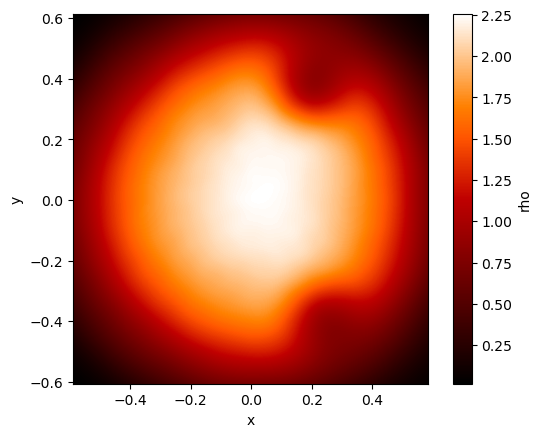

In [3]:
sdf.render('rho', xsec=1.0)

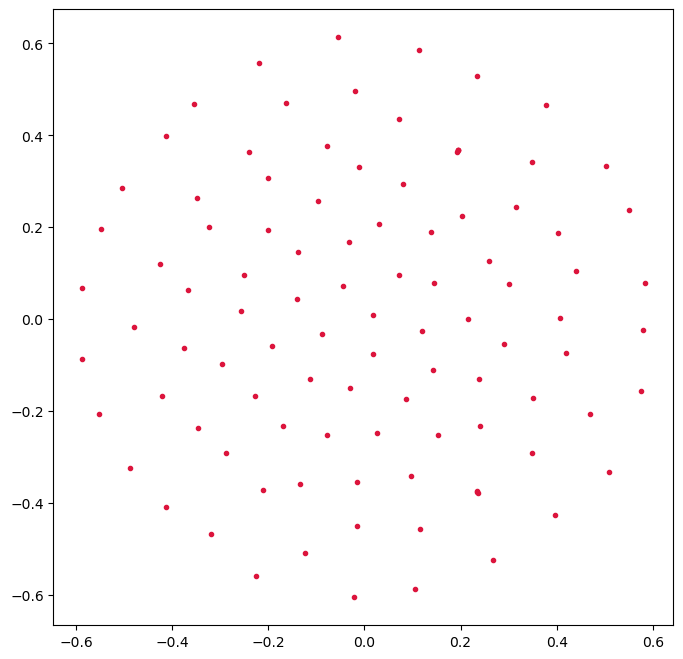

In [4]:
fig = plt.figure(figsize=(8,8))
plt.plot(sdf['x'], sdf['y'], '.', color='crimson')
plt.show()

# Density Distribution

In [5]:
def density_theo(r, R, lmbda, k):
    return lmbda/(4*k)*(R**2-r**2)

In [6]:
R = 0.75
k = 0.1
M = 2.0
n = 1.0
lmbda = 2*k / (np.pi**(1/n)) * (M*(1+n)/R**2)**(1+1/n)/M

In [7]:
r = np.linspace(0.001, 1.1*R, 100)
dens = density_theo(r, R, lmbda, k)

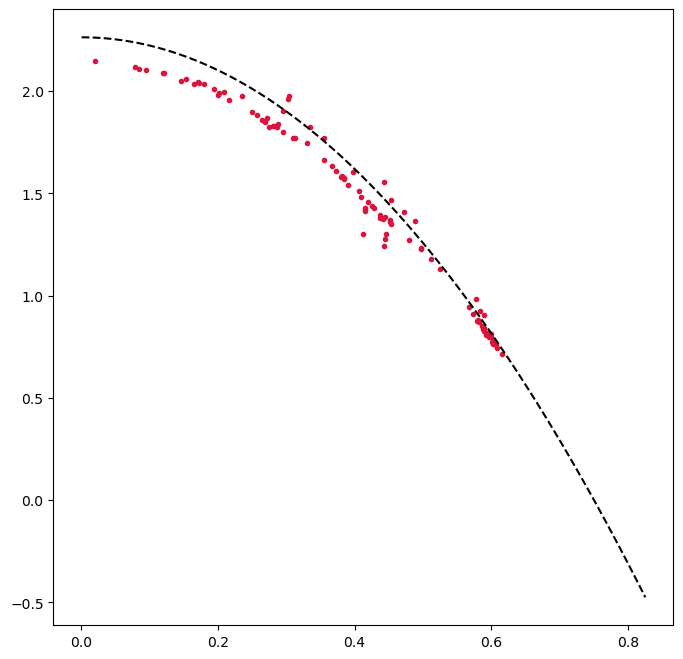

In [8]:
fig = plt.figure(figsize=(8,8))
plt.plot(np.sqrt(sdf['x']**2+sdf['y']**2), sdf['rho'], '.', color='crimson')
plt.plot(r, dens, '--', color='k')
plt.show()